# Crop Field Prediction

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier   
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load the dataset

In [6]:
df = pd.read_csv('./Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Analysement

In [7]:
df.shape

(2200, 8)

In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
df['label'].value_counts()

lentil         100
watermelon     100
mothbeans      100
pomegranate    100
kidneybeans    100
chickpea       100
mango          100
blackgram      100
maize          100
pigeonpeas     100
grapes         100
jute           100
apple          100
papaya         100
rice           100
mungbean       100
orange         100
cotton         100
banana         100
muskmelon      100
coconut        100
coffee         100
Name: label, dtype: int64

## Data Visualization

### Nitrogen

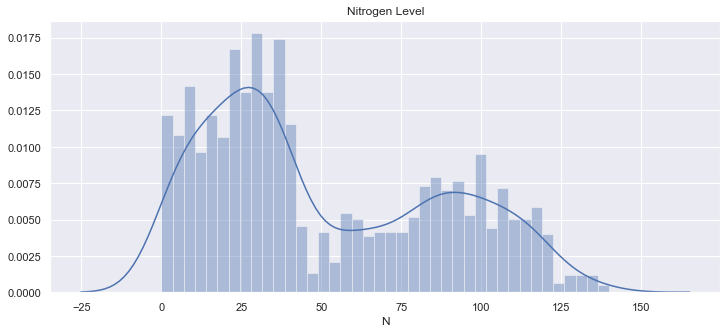

In [12]:
plt.figure(figsize=(12,5))

sns.distplot(df['N'],bins=40)
plt.title('Nitrogen Level')
plt.show()

### Phosphorus

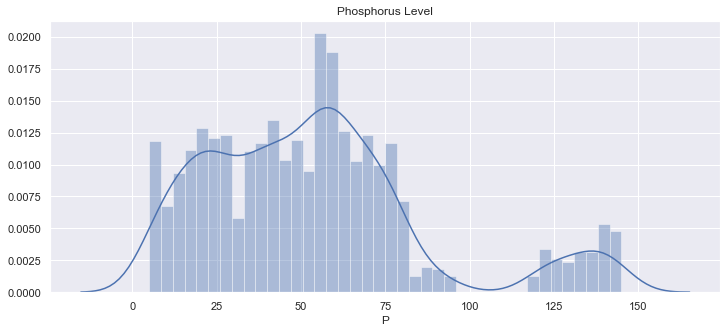

In [13]:
plt.figure(figsize=(12,5))

sns.distplot(df['P'],bins=40)
plt.title('Phosphorus Level')
plt.show()

In [14]:
len(df[df['P']>100])

200

In [15]:
df[(df['P'] > 100)]['label'].value_counts()

apple     100
grapes    100
Name: label, dtype: int64

### Potassium

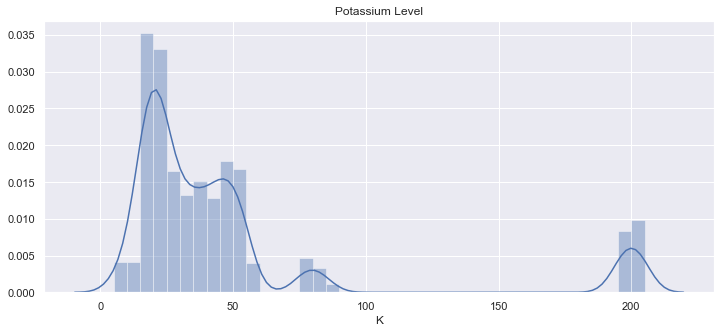

In [16]:
plt.figure(figsize=(12,5))

sns.distplot(df['K'],bins=40)
plt.title('Potassium Level')
plt.show()

In [17]:
len(df[(df['K'] > 85) & (df['K']< 195)])

0

In [18]:
len(df[(df['K'] > 195)])

182

In [19]:
df[(df['K'] > 100)]['label'].value_counts()

apple     100
grapes    100
Name: label, dtype: int64

### Temperature, Humidity and ph

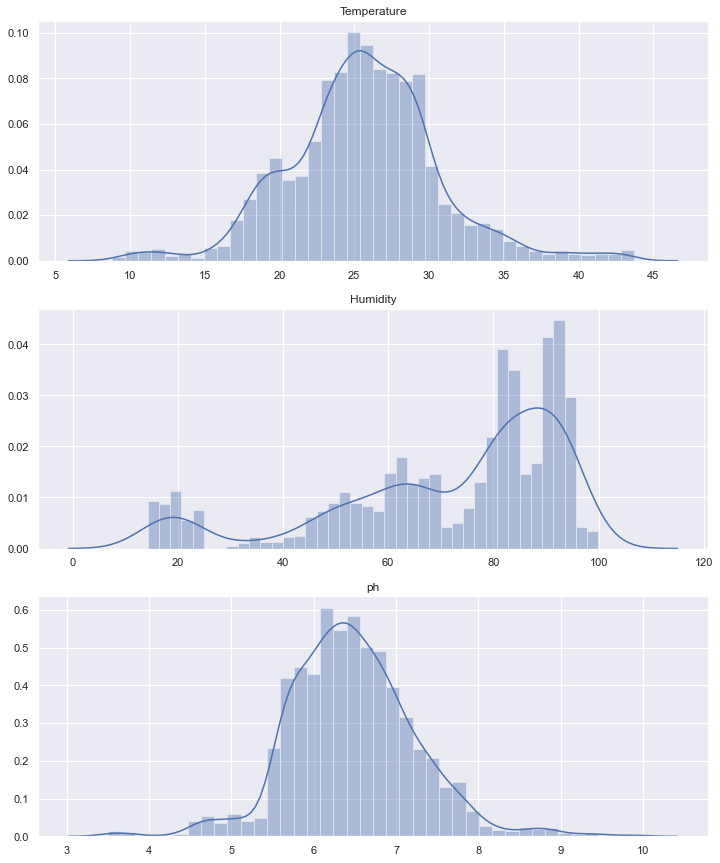

In [20]:
plt.figure(figsize=(12,15))

plt.subplot(3,1,1)
sns.distplot(df['temperature'],bins=40)
plt.title('Temperature')
plt.xlabel('')

plt.subplot(3,1,2)
sns.distplot(df['humidity'],bins=40)
plt.title('Humidity')
plt.xlabel('')

plt.subplot(3,1,3)
sns.distplot(df['ph'],bins=40)
plt.title('ph')
plt.xlabel('')
plt.show()

## Scatter Plots

<Figure size 4500x4500 with 0 Axes>

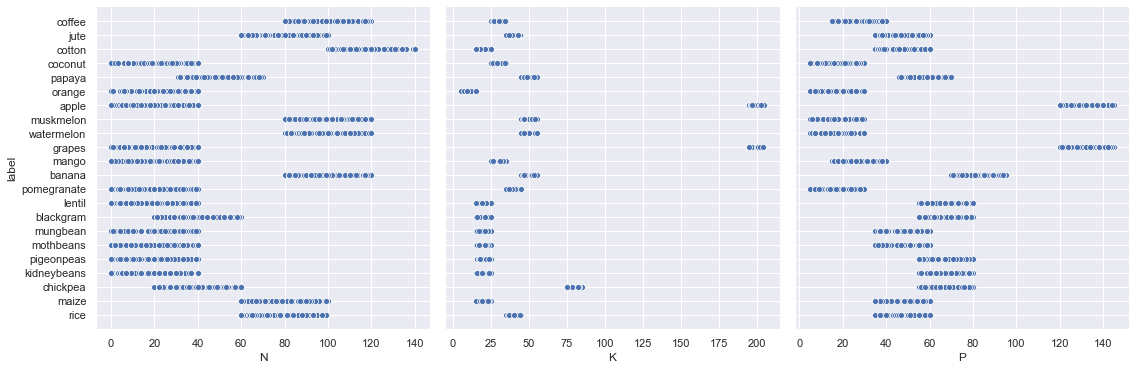

In [21]:
plt.figure(figsize=(15,15),dpi=300)
sns.pairplot(x_vars=['N','K','P'],y_vars='label',data=df,height=5)
plt.show()

<Figure size 4500x4500 with 0 Axes>

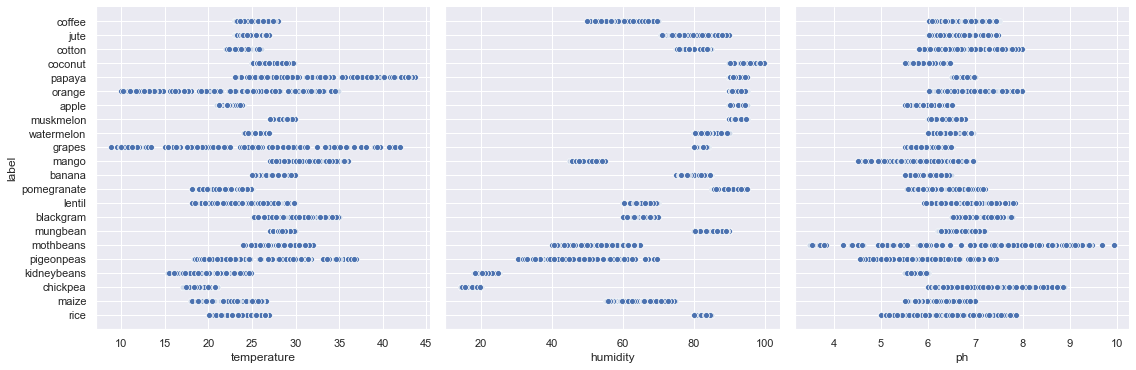

In [22]:
plt.figure(figsize=(15,15),dpi=300)
sns.pairplot(x_vars=['temperature','humidity','ph'],y_vars='label',data=df,height=5)
plt.show()

## Categorical to Numerical

In [23]:
label_encoder = LabelEncoder()

In [24]:
df['numeric_label'] = label_encoder.fit_transform(df['label'])

In [25]:
label_encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [26]:
df['numeric_label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [27]:
label_encoder.inverse_transform([13])

array(['mothbeans'], dtype=object)

In [28]:
label_encoder.transform(y=['rice'])

array([20], dtype=int64)

In [29]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,numeric_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


## Train Test Split

In [30]:
X = df.drop(['label','numeric_label'],axis=1)
y = df['numeric_label']

In [31]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Data Standardized

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

## GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [36]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,svm,0.988636,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.990909,{'n_estimators': 10}
2,logistic_regression,0.979545,{'C': 10}
3,naive_bayes_gaussian,0.996023,{}
4,decision_tree,0.987500,{'criterion': 'gini'}


## Model Training

- Model: Random Forest Classifier

In [37]:
model = RandomForestClassifier(n_estimators=10)

In [39]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## Test Predictions

In [40]:
predictions = model.predict(X_test)

In [49]:
print('Accuracy Score: '+str(round(accuracy_score(y_test,predictions)*100,2))+'%')

Accuracy Score: 99.32%


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       0.96      0.92      0.94        25
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00        17
          17       1.00    

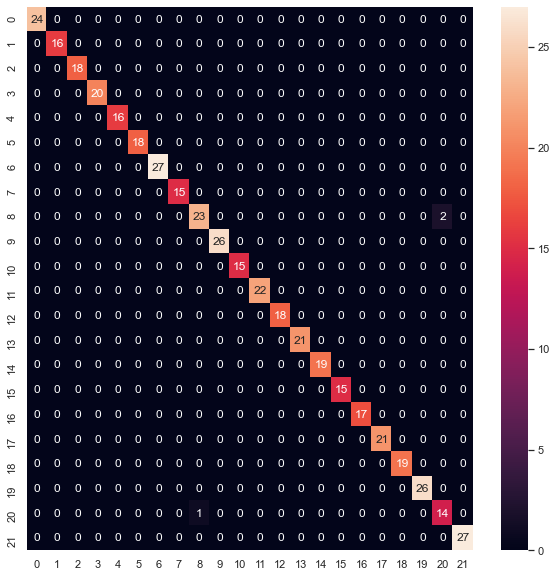

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

## Model Training - Complete Dataset

In [55]:
model = RandomForestClassifier(n_estimators=10)

In [57]:
X = df.drop(['label','numeric_label'],axis=1)
y = df['numeric_label']

In [61]:
X = scaler.transform(X)

In [62]:
model.fit(X,y)

RandomForestClassifier(n_estimators=10)

## Saving Model

In [64]:
import joblib

In [65]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [66]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [67]:
joblib.dump(label_encoder,'encoder.pkl')

['encoder.pkl']